In [1]:
import numpy as np 
import pandas as pd 

In [3]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [77]:
df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'transact_hour', 'transact_mth', 'age'],
      dtype='object')

In [75]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'transact_hour', 'transact_mth', 'age'],
      dtype='object')

In [6]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [13]:
cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']

for col in cols:
    print(f"{col} : {len(df_train[col].unique())}")

Unnamed: 0 : 1296675
trans_date_trans_time : 1274791
cc_num : 983
merchant : 693
category : 14
amt : 52928
first : 352
last : 481
gender : 2
street : 983
city : 894
state : 51
zip : 970
lat : 968
long : 969
city_pop : 879
job : 494
dob : 968
trans_num : 1296675
unix_time : 1274823
merch_lat : 1247805
merch_long : 1275745
is_fraud : 2


In [15]:
cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']

for col in cols:
    print(f"{col} : {len(df_test[col].unique())}")

Unnamed: 0 : 555719
trans_date_trans_time : 544760
cc_num : 924
merchant : 693
category : 14
amt : 37256
first : 341
last : 471
gender : 2
street : 924
city : 849
state : 50
zip : 912
lat : 910
long : 910
city_pop : 835
job : 478
dob : 910
trans_num : 555719
unix_time : 544760
merch_lat : 546490
merch_long : 551770
is_fraud : 2


In [17]:
df_train.drop(['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 
           'city', 'state', 'dob', 'cc_num'], axis=1, inplace=True)

In [19]:
df_train.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_test.drop(['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 
           'city', 'state', 'dob', 'cc_num'], axis=1, inplace=True)

In [23]:
df_test.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [26]:
def label_encoding(df):
    label_encoder = LabelEncoder()
    categorical_cols = ['merchant', 'category', 'gender', 'job', 'trans_num']
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    

In [29]:
label_encoding(df_test)


In [39]:
df_test.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,29209,33.9659,-80.9355,333497,275,98699,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,84002,40.3207,-110.4360,302,392,108785,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,11710,40.6729,-73.5365,34496,259,433979,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,32780,28.5697,-80.8191,54767,407,71993,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,49632,44.2529,-85.0170,1126,196,190585,1371816917,44.959148,-85.884734,0


In [41]:
label_encoder = LabelEncoder()
categorical_cols = ['merchant', 'category', 'gender', 'job', 'trans_num']
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [42]:
df_train.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,28654,36.0788,-81.1781,3495,370,56438,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,99160,48.8878,-118.2105,149,428,159395,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,83252,42.1808,-112.2620,4154,307,818703,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,59632,46.2306,-112.1138,1939,328,544575,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,24433,38.4207,-79.4629,99,116,831111,1325376186,38.674999,-78.632459,0


In [83]:
gender = df_train['gender'].value_counts()
gender

F    709863
M    586812
Name: gender, dtype: int64

In [43]:
X = df_train.drop('is_fraud', axis=1)
y = df_train['is_fraud']

In [45]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [143]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = model.predict(x_test_scaled)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[257689    145]
 [   519    982]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.87      0.65      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.83      0.87    259335
weighted avg       1.00      1.00      1.00    259335


Accuracy Score: 0.9974396051439258


In [67]:
x_test = df_test.drop('is_fraud', axis=1)

In [69]:
x_test_scaled = scaler.transform(x_test)

In [71]:
y_pred = model.predict(x_test_scaled)

In [73]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
df_test['predicted_is_fraud'] = y_pred

In [77]:
df_test

,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,predicted_is_fraud
0,319,10,2.86,1,29209,33.9659,-80.9355,333497,275,98699,1371816865,33.986391,-81.200714,0,0
1,591,10,29.84,0,84002,40.3207,-110.4360,302,392,108785,1371816873,39.450498,-109.960431,0,0
2,611,5,41.28,0,11710,40.6729,-73.5365,34496,259,433979,1371816893,40.495810,-74.196111,0,0
3,222,9,60.05,1,32780,28.5697,-80.8191,54767,407,71993,1371816915,28.812398,-80.883061,0,0
4,292,13,3.19,1,49632,44.2529,-85.0170,1126,196,190585,1371816917,44.959148,-85.884734,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,63453,40.4931,-91.8912,519,460,336391,1388534347,39.946837,-91.333331,0,0
555715,264,7,111.84,1,77566,29.0393,-95.4401,28739,198,70372,1388534349,29.661049,-96.186633,0,0
555716,496,7,86.88,0,99323,46.1966,-118.9017,3684,294,235088,1388534355,46.658340,-119.715054,0,0
555717,75,13,7.99,1,83643,44.6255,-116.4493,129,58,43546,1388534364,44.470525,-117.080888,0,0


In [81]:
prd_count = df_test['predicted_is_fraud'].value_counts()

In [89]:
prd_count

0    554422
1      1297
Name: predicted_is_fraud, dtype: int64

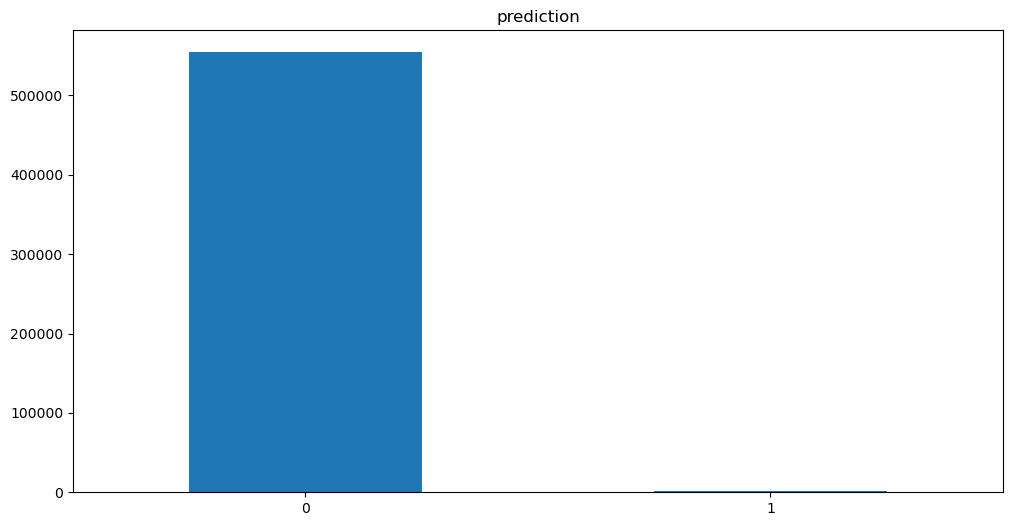

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('prediction')
prd_count.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [41]:
print(df_train['is_fraud'].value_counts())


0    1289169
1       7506
Name: is_fraud, dtype: int64


In [103]:
from sklearn.linear_model import LogisticRegression

In [105]:
# Training the model for logisticRegression
log_model = LogisticRegression()

In [145]:
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [147]:
y_pred = log_model.predict(x_test_scaled)

In [149]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

[[257701    133]
 [  1501      0]]
Accuracy: 0.9936992692849018


In [155]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [159]:
tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [161]:
y_pred = log_model.predict(x_test_scaled)

In [163]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

[[257701    133]
 [  1501      0]]
Accuracy: 0.9936992692849018
